<a href="https://colab.research.google.com/github/MrPer4ik/PatternRecognition/blob/main/TaskImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

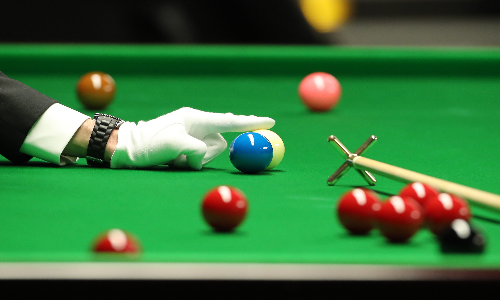

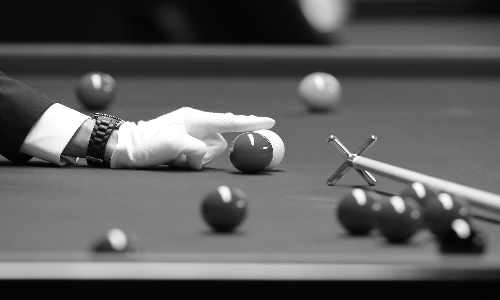

In [2]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/snooker.jpg')
img = cv2.resize(img, (500, 300))
cv2_imshow(img)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

# Масштабування

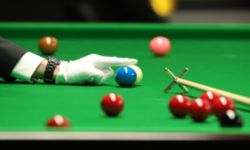

In [3]:
img = cv2.pyrDown(img)
cv2_imshow(img)

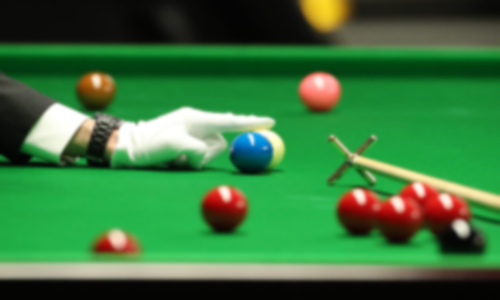

In [4]:
img = cv2.pyrUp(img)
cv2_imshow(img)

# Поворот

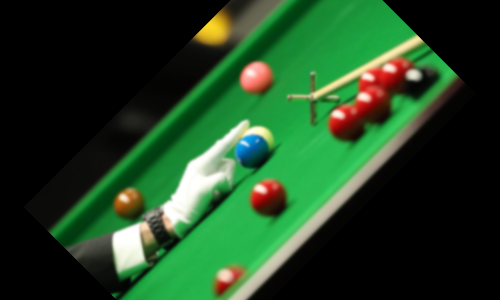

In [5]:
angle = 45 #@param {type:"slider", min:-180, max:180, step:2}
rotation_matrix = cv2.getRotationMatrix2D(
    center=(img.shape[0]/2, img.shape[1]/2)[::-1],
    angle=angle, scale=0.8)
rotated_image = cv2.warpAffine(
    src=img, M=rotation_matrix, 
    dsize=(img.shape[:2])[::-1])
cv2_imshow(rotated_image)

# Перекіс

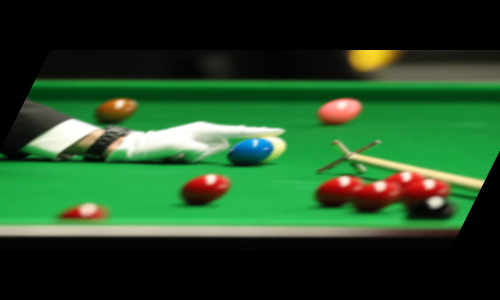

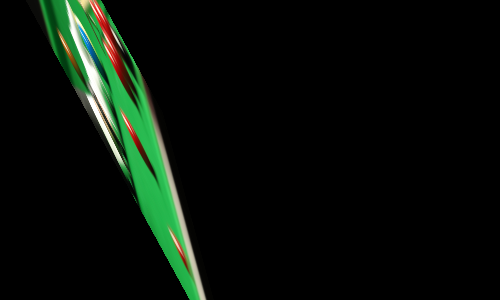

In [6]:
simple_aff_transform = cv2.getAffineTransform(
    np.float32([[0, 0], [150, 150], [200, 150]]), 
    np.float32([[50, 50], [150, 150], [200, 150]])
)
complex_aff_transform = cv2.getAffineTransform(
    np.float32([[0, 0], [100, 200], [250, 300]]), 
    np.float32([[20, -10], [150, 200], [200, 250]])
)
skewed_img = cv2.warpAffine(img, simple_aff_transform, (img.shape[:2])[::-1])
complex_skewed_img = cv2.warpAffine(img, complex_aff_transform, 
                                    (img.shape[:2])[::-1])
cv2_imshow(skewed_img)
cv2_imshow(complex_skewed_img)

# Видалити частину зображення -> вирізати частину

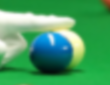

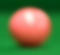

In [7]:
cropped_blue = img[100:185, 200:310]
cropped_pink = img[65:120, 290:350]

cv2_imshow(cropped_blue)
cv2_imshow(cropped_pink)

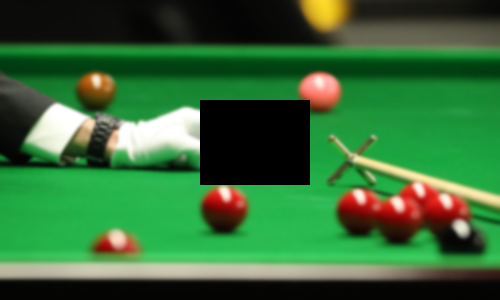

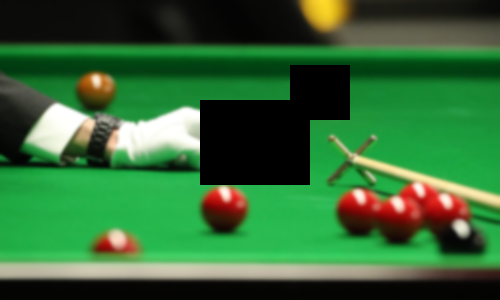

In [8]:
img_wthout_blue = img.copy()
img_wthout_blue[100:185, 200:310] = np.zeros(img_wthout_blue[100:185, 200:310].shape)
cv2_imshow(img_wthout_blue)

img_wthout_blue_pink = img_wthout_blue
img_wthout_blue_pink[65:120, 290:350] = np.zeros(img_wthout_blue_pink[65:120, 290:350].shape)
cv2_imshow(img_wthout_blue_pink)

# Переміщення

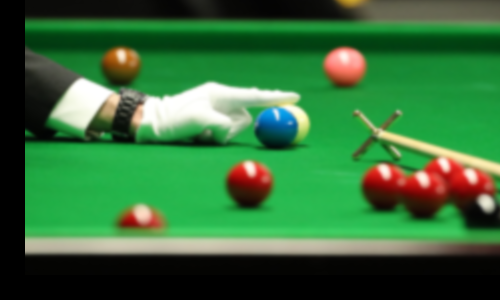

In [9]:
delta_x = 25 #@param {type:"slider", min:-50, max:50, step:1}
delta_y = -25 #@param {type:"slider", min:-50, max:50, step:1}

translation_matrix = np.array([
    [1, 0, delta_x],
    [0, 1, delta_y]
], dtype=np.float32)
translated_image = cv2.warpAffine(src=img, M=translation_matrix, 
                                  dsize=(img.shape[:2])[::-1])

cv2_imshow(translated_image)

# Ерозія та розширення
Для виділення або видалення куль.

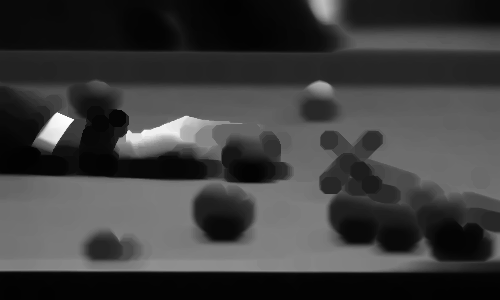

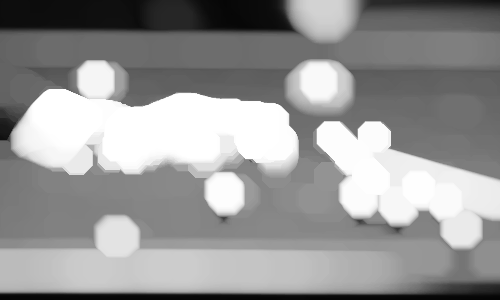

In [12]:
kernel = np.array(
    [
     [0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1, 1, 1, 0, 0],
     [0, 1, 1, 0, 1, 1, 0],
     [0, 1, 0, 0, 0, 1, 0],
     [0, 1, 1, 0, 1, 1, 0],
     [0, 0, 1, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0, 0]
     ],
np.uint8)

img_erosion = cv2.erode(gray_img, kernel, iterations=4)
img_dilation = cv2.dilate(gray_img, kernel, iterations=7)

cv2_imshow(img_erosion)
cv2_imshow(img_dilation)